###Heart Disease Prediction


Details


      --Missing Attribute Values: Several.  Distinguished with value -9.0
       --1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        
      -- 4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs)       
      -- 7. #19 (restecg)   
      -- 8. #32 (thalach)   
      -- 9. #38 (exang)     
      -- 10. #40 (oldpeak)   
      -- 11. #41 (slope)     
      -- 12. #44 (ca)        
      -- 13. #51 (thal)      
      -- 14. #58 (num)       (the predicted attribute)

      
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
     
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     10 trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
     
     12 chol: serum cholestoral in mg/dl
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     32 thalach: maximum heart rate achieved
     38 exang: exercise induced angina (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     44 ca: number of major vessels (0-3) colored by flourosopy
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)  predicted attribute

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('/content/processed.cleveland.data')
dataset.tail()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [3]:
dataset=dataset.replace('?',0.0)
dataset.iloc[:, -1]=dataset.iloc[:, -1].replace(2,1)  #-- Value 0: < 50% diameter narrowing
dataset.iloc[:, -1]=dataset.iloc[:, -1].replace(3,1)  #-- Value 1: > 50% diameter narrowing
dataset.iloc[:, -1]=dataset.iloc[:, -1].replace(4,1)
dataset.tail()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


In [4]:
dataset.isnull().sum()

63.0     0
1.0      0
1.0.1    0
145.0    0
233.0    0
1.0.2    0
2.0      0
150.0    0
0.0      0
2.3      0
3.0      0
0.0.1    0
6.0      0
0        0
dtype: int64

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
print(X_train)

[[35.0 1.0 4.0 ... 2.0 '0.0' '7.0']
 [57.0 1.0 3.0 ... 2.0 '1.0' '7.0']
 [58.0 1.0 4.0 ... 3.0 '3.0' '6.0']
 ...
 [63.0 1.0 4.0 ... 1.0 '3.0' '7.0']
 [65.0 0.0 3.0 ... 1.0 '1.0' '3.0']
 [62.0 0.0 4.0 ... 2.0 '0.0' '3.0']]


In [8]:
print(y_train)

[1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0
 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1
 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0]


In [9]:
print(X_test)

[[47.0 1.0 4.0 ... 1.0 '0.0' '3.0']
 [55.0 1.0 4.0 ... 2.0 '1.0' '7.0']
 [66.0 1.0 4.0 ... 1.0 '1.0' '3.0']
 ...
 [51.0 0.0 3.0 ... 1.0 '1.0' '3.0']
 [71.0 0.0 4.0 ... 2.0 '0.0' '3.0']
 [42.0 1.0 2.0 ... 1.0 '0.0' '3.0']]


In [10]:
print(y_test)

[0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0
 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0]


## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(X_train)

[[-2.18723594  0.68958283  0.92248275 ...  0.69099868 -0.68042997
   1.17224209]
 [ 0.31477225  0.68958283 -0.15887203 ...  0.69099868  0.41552975
   1.17224209]
 [ 0.42849989  0.68958283  0.92248275 ...  2.36686906  2.6074492
   0.66746029]
 ...
 [ 0.99713812  0.68958283  0.92248275 ... -0.98487169  2.6074492
   1.17224209]
 [ 1.22459341 -1.45015212 -0.15887203 ... -0.98487169  0.41552975
  -0.84688511]
 [ 0.88341047 -1.45015212  0.92248275 ...  0.69099868 -0.68042997
  -0.84688511]]


In [13]:
print(X_test)

[[-0.8225042   0.68958283  0.92248275 ... -0.98487169 -0.68042997
  -0.84688511]
 [ 0.08731696  0.68958283  0.92248275 ...  0.69099868  0.41552975
   1.17224209]
 [ 1.33832105  0.68958283  0.92248275 ... -0.98487169  0.41552975
  -0.84688511]
 ...
 [-0.36759362 -1.45015212 -0.15887203 ... -0.98487169  0.41552975
  -0.84688511]
 [ 1.90695928 -1.45015212  0.92248275 ...  0.69099868 -0.68042997
  -0.84688511]
 [-1.39114242  0.68958283 -1.2402268  ... -0.98487169 -0.68042997
  -0.84688511]]


## Training the Logistic Regression model on the Training set

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[45  6]
 [ 3 37]]


0.9010989010989011

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


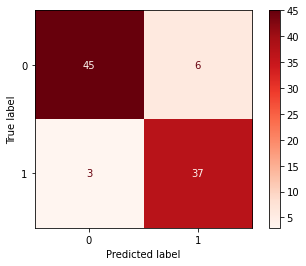

In [17]:
from sklearn.metrics import plot_confusion_matrix
matr=plot_confusion_matrix(classifier,X_test,y_test,cmap='Reds')


In [18]:
# [45  6]
#  [ 3 37]]
tn=45
fp=6
fn=3
tp=37



##Precision

In [19]:
precision=tp/(tp+fp)
print(precision)

0.8604651162790697


##Recall

In [20]:
recall=tp/(tp+fn)
print(recall)

0.925


#F1 Score

In [21]:
f1=2*((precision*recall)/(precision+recall))
print(f1)

0.891566265060241
